In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import librosa as lr
import phonlab.track_formants as tf

import importlib
importlib.reload(tf)  # force reload for testing while in development

audiodir = Path('../resource/audio/')

### The basic case: specify a sound file name

* LPC analysis is used by default
* The filter order for lpc is chosen for you, to provide a good fit
* The returned Pandas dataframe has f0, F1-4, rms amplitude

LPC_tracking(), with order set to -1, and pitch range [63, 400]
Selected LPC order is: 10


[Text(0.5, 0, 'Time (seconds)'), Text(0, 0.5, 'Formants (Hz)')]

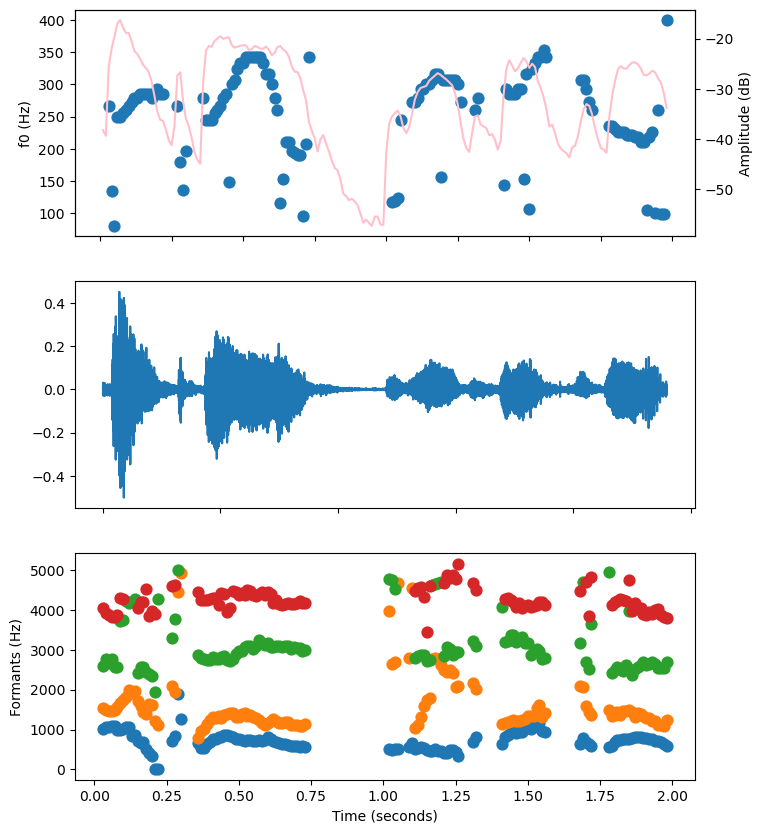

In [2]:
df, y  = tf.track_formants(audiodir / 'Female_example.wav')

threshold = np.min(df.rms) + (np.max(df.rms)-np.min(df.rms))/2
df['f0'] = np.where(df['rms']<threshold, np.nan, df.f0)  # replace low amplitude sections with NaN
df['F1'] = np.where(df['rms']<threshold, np.nan, df.F1)
df['F2'] = np.where(df['rms']<threshold, np.nan, df.F2)
df['F3'] = np.where(df['rms']<threshold, np.nan, df.F3)
df['F4'] = np.where(df['rms']<threshold, np.nan, df.F4)


fig, axs = plt.subplots(3,1,figsize=(8,10))

ax2 = axs[0].twinx()
sns.pointplot(df,x='sec',y='f0',linestyle='none',native_scale=True, ax=axs[0])
sns.lineplot(df,x='sec',y='rms',color="pink",ax=ax2)
axs[0].set(xticklabels=[],xlabel=None,ylabel='f0 (Hz)')  # remove the tick labels
ax2.set(ylabel="Amplitude (dB)")

axs[1].plot(y)
axs[1].set(xticklabels=[],xlabel=None)  # remove the tick labels

sns.pointplot(df,x="sec",y="F1",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F2",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F3",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F4",linestyle='none',native_scale=True, ax=axs[2])
axs[2].set(xlabel = "Time (seconds)",ylabel="Formants (Hz)")

### Use the Inverse Filter Control method

* The variable "speaker" must be set (0 = male, 1 = female, 2 = child)
* This example, adjusts the pitch range (f0_range) for a higher pitched voice
* We are also demonstrating the use of 'quiet' to suppress messages during track formants


In [3]:
df,y = tf.track_formants(audiodir / 'Female_example.wav', method='ifc', f0_range = [150,400], speaker = 1, quiet=True)

print(f"Median F2 is: {df.F2.median()}")
print(f"Mean f0 is: {df.f0.mean():0.1f}")

Median F2 is: 1563.55
Mean f0 is: 271.0


[Text(0.5, 0, 'Time (seconds)'), Text(0, 0.5, 'Formants (Hz)')]

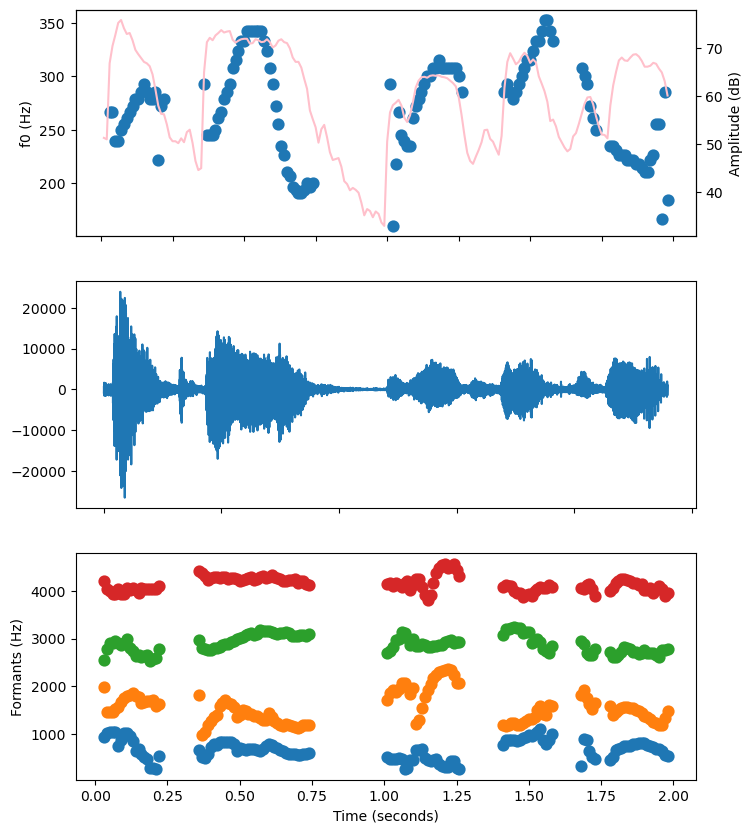

In [4]:
threshold = np.min(df.rms) + (np.max(df.rms)-np.min(df.rms))/2
df['f0'] = np.where(df['rms']<threshold, np.nan, df.f0)  # replace low amplitude sections with NaN
df['F1'] = np.where(df['rms']<threshold, np.nan, df.F1)
df['F2'] = np.where(df['rms']<threshold, np.nan, df.F2)
df['F3'] = np.where(df['rms']<threshold, np.nan, df.F3)
df['F4'] = np.where(df['rms']<threshold, np.nan, df.F4)


fig, axs = plt.subplots(3,1,figsize=(8,10))

ax2 = axs[0].twinx()
sns.pointplot(df,x='sec',y='f0',linestyle='none',native_scale=True, ax=axs[0])
sns.lineplot(df,x='sec',y='rms',color="pink",ax=ax2)
axs[0].set(xticklabels=[],xlabel=None,ylabel='f0 (Hz)')  # remove the tick labels
ax2.set(ylabel="Amplitude (dB)")

axs[1].plot(y)
axs[1].set(xticklabels=[],xlabel=None)  # remove the tick labels

sns.pointplot(df,x="sec",y="F1",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F2",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F3",linestyle='none',native_scale=True, ax=axs[2])
sns.pointplot(df,x="sec",y="F4",linestyle='none',native_scale=True, ax=axs[2])
axs[2].set(xlabel = "Time (seconds)",ylabel="Formants (Hz)")

### Pass an audio array instead of a filename

* Here we used librosa to load the audio (and perhaps did other things with it)
* Note that the audio is downsampled to the rate required in track formants
* The fast method is not as accurate as the others

In [5]:
x,fs = lr.load(audiodir / 'Female_example.wav')
df,y = tf.track_formants(x, sample_rate=fs, method = 'ifc_fast', f0_range = [150,400], speaker=1)

print(f"\nMedian F2 is: {df.F2.median()}")
print(f"Mean f0 is: {df.f0.mean():0.1f}")
print(f"\nThe original audio is {len(x)} samples, and the audio returned by track formants is {len(y)} samples.")

IFC_tracking(), using method ifc_fast, with speaker set to 1, and pitch range [150, 400]
Resampling from 22050 to 12000
 done         

Median F2 is: 1379.9
Mean f0 is: 272.3

The original audio is 44059 samples, and the audio returned by track formants is 23977 samples.


### Use the original IFC method

* Reusing the audio array that was read in the previous block
* This method is too slow to be very practical

In [6]:
df,y = tf.track_formants(x, sample_rate=fs, method = 'ifc_old', f0_range = [150,400], speaker=1)

print(f"\nMedian F2 is: {df.F2.median()}")
print(f"Mean f0 is: {df.f0.mean():0.1f}")

IFC_tracking(), using method ifc_old, with speaker set to 1, and pitch range [150, 400]
Resampling from 22050 to 12000
 done         

Median F2 is: 1569.5500000000002
Mean f0 is: 271.6
